In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
df = pd.read_csv("OxCGRT_raw_USA_v1.csv")

/var/folders/4c/sd5grc691sx_dp1xqn1s9dyc0000gq/T/ipykernel_1486/3994568911.py:1: DtypeWarning: Columns (65,67,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("OxCGRT_raw_USA_v1.csv")


In [3]:
for col in df.columns:
    print(col)

CountryName
CountryCode
RegionName
RegionCode
Jurisdiction
Date
C1E_School closing
C1E_Flag
C1NV_School closing
C1NV_Flag
C1V_School closing
C1V_Flag
C1_Notes
C2E_Workplace closing
C2E_Flag
C2NV_Workplace closing
C2NV_Flag
C2V_Workplace closing
C2V_Flag
C2_Notes
C3E_Cancel public events
C3E_Flag
C3NV_Cancel public events
C3NV_Flag
C3V_Cancel public events
C3V_Flag
C3_Notes
C4E_Restrictions on gatherings
C4E_Flag
C4NV_Restrictions on gatherings
C4NV_Flag
C4V_Restrictions on gatherings
C4V_Flag
C4_Notes
C5E_Close public transport
C5E_Flag
C5NV_Close public transport
C5NV_Flag
C5V_Close public transport
C5V_Flag
C5_Notes
C6E_Stay at home requirements
C6E_Flag
C6NV_Stay at home requirements
C6NV_Flag
C6V_Stay at home requirements
C6V_Flag
C6_Notes
C7E_Restrictions on internal movement
C7E_Flag
C7NV_Restrictions on internal movement
C7NV_Flag
C7V_Restrictions on internal movement
C7V_Flag
C7_Notes
C8E_International travel controls
C8NV_International travel controls
C8V_International travel 

In [40]:
c1_cols = ["C1E_School closing", "C1_Notes"]
index_cols = ["CountryName", "CountryCode", "RegionName", "RegionCode", "Date"]
c1 = df[index_cols + c1_cols]
c1 = c1[c1["RegionName"] == "Texas"]
c1 = c1.dropna(subset=c1_cols)
c1 = c1.sort_values(by=["Date"])
len(c1)

88

In [ ]:
def extract_urls(text: str) -> list[str]:
    url_pattern = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    urls = re.findall(url_pattern, text)
    return urls

def create_dataset(c1: pd.DataFrame) -> pd.DataFrame:
    policy = "C1E_School closing"
    region = "Texas"
    data = []
    for i, row in c1.iterrows():
        date = pd.to_datetime(row["Date"], format="%Y%m%d").date()
        score = row[policy]
        urls = extract_urls(row["C1_Notes"])
        url_string = ", ".join(urls)
        to_add = {"Date": date, "Region": region, "Policy": policy, "score": score, "source": url_string}
        data.append(to_add)

    df = pd.DataFrame(data)
    return df

texas = create_dataset(c1)
texas.drop(columns=["score"]).to_csv("texas.csv", index=False)
texas.drop(columns=["source"]).to_csv("texas-labels.csv", index=False)

KeyError: "['score'] not found in axis"

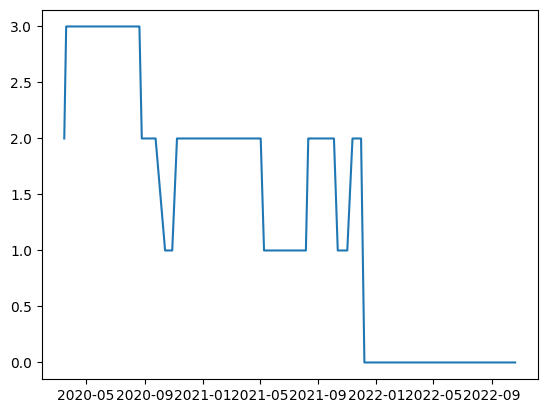

In [ ]:
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(c1["Date"], format="%Y%m%d"), c1["C1E_School closing"])
ax.set_xlabel("Date")
plt.show()

In [8]:
pd.to_datetime("20200301")

Timestamp('2020-03-01 00:00:00')

In [11]:
def create_initial_persistence():
    rows = []
    rows.append({"date": pd.to_datetime("November 28 2020"), "region": "United States", "criterion": "C1E", "score": 3})
    rows.append({"date": pd.to_datetime("September 14 2024"), "region": "United States", "criterion": "C1E", "score": 0})

    df = pd.DataFrame(rows)
    df.to_csv("persistence.csv", index=False)

create_initial_persistence()